# Ensemble

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import the predictions
df = pd.concat(map(pd.read_csv, ['../03 Forecasting Product/01 Facebook Prophet/out/predictions_prophet.csv',
                                 '../03 Forecasting Product/02 SARIMAX/out/predictions_sarimax.csv',
                                 '../03 Forecasting Product/03 Linkedin Silverkite/out/predictions_silverkite.csv',
                                 '../03 Forecasting Product/04 RNN-LSTM/out/predictions_lstm.csv']),
               axis = 1)
df.head()

,ds,prophet,Date,sarimax,Unnamed: 0,ts,silverkite,Date,lstm
0,2021-01-01,724.480101,2021-01-01,739.873549,2192,2021-01-01,751.509648,2021-01-01,733.688567
1,2021-01-02,836.016157,2021-01-02,856.310352,2193,2021-01-02,836.244799,2021-01-02,897.281791
2,2021-01-03,754.639245,2021-01-03,767.566589,2194,2021-01-03,754.438222,2021-01-03,776.013498
3,2021-01-04,880.935735,2021-01-04,907.624098,2195,2021-01-04,898.366173,2021-01-04,938.918450
4,2021-01-05,750.931655,2021-01-05,779.801245,2196,2021-01-05,781.204767,2021-01-05,784.304921


In [3]:
# Fetch what we need
df = df[["ds", "prophet", "sarimax", "silverkite", "lstm"]]
df.head()

,ds,prophet,sarimax,silverkite,lstm
0,2021-01-01,724.480101,739.873549,751.509648,733.688567
1,2021-01-02,836.016157,856.310352,836.244799,897.281791
2,2021-01-03,754.639245,767.566589,754.438222,776.013498
3,2021-01-04,880.935735,907.624098,898.366173,938.918450
4,2021-01-05,750.931655,779.801245,781.204767,784.304921


In [4]:
# index
df.index = df.pop('ds')
df.head(1)

,prophet,sarimax,silverkite,lstm
ds,,,,
2021-01-01,724.480101,739.873549,751.509648,733.688567


## Ensemble

In [6]:
# getting the error
error_prophet = float(pd.read_csv("../02 Parameter Tuning/01 Facebook Prophet/out/best_params_prophet.csv").iloc[4, 1])
error_sarimax = pd.read_csv("../02 Parameter Tuning/02 SARIMAX/out/best_params_sarimax.csv").iloc[6, 1]
error_silverkite = float(pd.read_csv("../02 Parameter Tuning/03 Linkedin Silverkite/out/best_params_silverkite.csv").iloc[0, 1])
error_lstm = pd.read_csv("../02 Parameter Tuning/04 RNN-LSTM/out/best_params_lstm.csv").iloc[7, 1]

In [10]:
# average error
average_error = (error_prophet + error_sarimax + error_silverkite + error_lstm)/4
print(f"The average error is {average_error}")

The average error is 59.78394763516848


In [11]:
#Initial Weights
weight_prophet = 0.25 / (error_prophet / average_error)
print(f"The Prophet weight is {weight_prophet}")

weight_sarimax = 0.25 / (error_sarimax / average_error)
print(f"The SARIMAX weight is {weight_sarimax}")

weight_silverkite = 0.25 / (error_silverkite / average_error)
print(f"The Silverkite weight is {weight_silverkite}")

weight_lstm = 0.25 / (error_lstm / average_error)
print(f"The LSTM weight is {weight_lstm}")

The Prophet weight is 0.311308649891644
The SARIMAX weight is 0.24928560338552827
The Silverkite weight is 0.3126775503931406
The LSTM weight is 0.17927225922201853


In [12]:
# Extra weight
extra_weight = weight_prophet + weight_sarimax + weight_silverkite + weight_lstm
print(f"Adding the weights equals to {extra_weight}")

Adding the weights equals to 1.0525440628923315


## Ensemble Forecast

In [13]:
# Ensemble
df['ensemble'] = (df.prophet * weight_prophet + df.sarimax * weight_sarimax + df.silverkite * weight_silverkite + df.lstm * weight_lstm) / extra_weight

<Axes: xlabel='ds'>

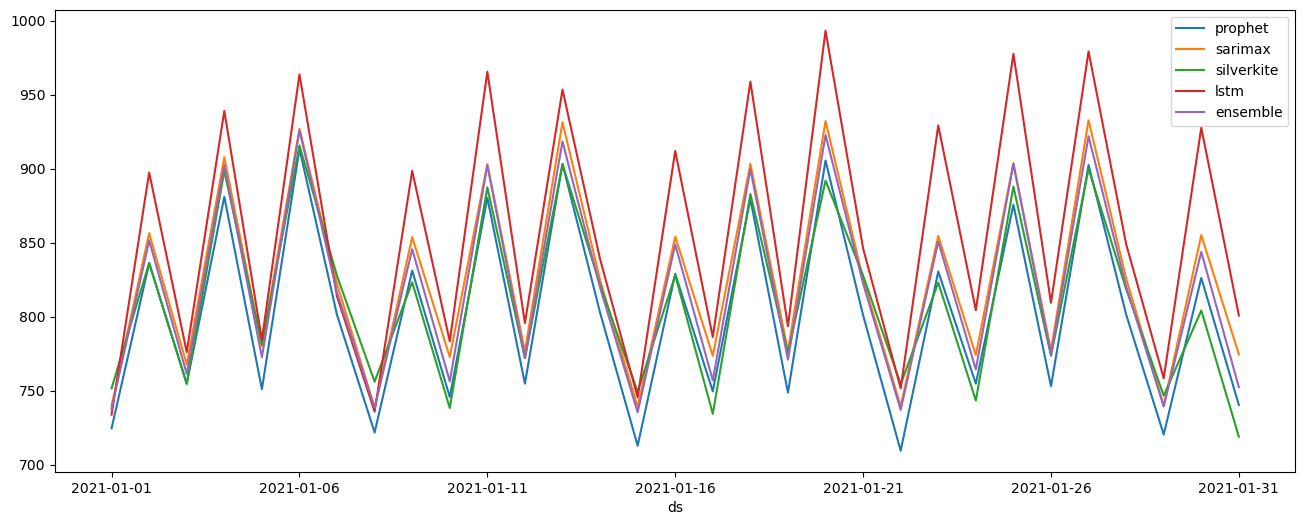

In [14]:
# Visualization
df.plot(figsize = (16,6), legend = True)